In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
import seaborn as sns
import tensorflow as tf
from imutils import paths
from itertools import cycle
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

/home/sanjeev/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#base_path = '/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Plots/X.npy'' # Data Path 
base_path = '/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/asm_images/'
img_list = glob.glob(os.path.join(base_path, '*/*.png'))

In [3]:
# classes in malimg data
categories = os.listdir(base_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

In [4]:
cur_dir = os.getcwd()
os.chdir(base_path)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family

for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
fam = []
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
        fam.append(list_fams[label])
    label += 1
num_classes = label

Label: 0	Family:           Gatak	Number of images: 1013
Label: 1	Family:    Kelihos_ver1	Number of images: 398
Label: 2	Family:    Kelihos_ver3	Number of images: 2942
Label: 3	Family:        Lollipop	Number of images: 2478
Label: 4	Family:  Obfuscator.ACY	Number of images: 1228
Label: 5	Family:          Ramnit	Number of images: 1541
Label: 6	Family:           Simda	Number of images: 42
Label: 7	Family:          Tracur	Number of images: 751
Label: 8	Family:           Vundo	Number of images: 475


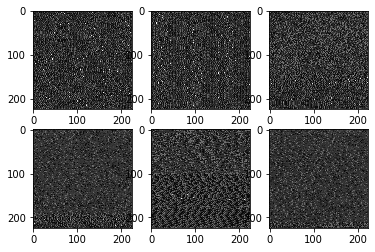

In [5]:
# Sample images from dataset
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [6]:
# Using Mobile net V1 as base model for feature extraction 

In [7]:
x = np.load('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_X.npy')
y = np.load('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_y.npy')

## Classification using ET(Extrra Tree Classifier)

In [8]:
import pandas as pd
import disarray as da
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, matthews_corrcoef, roc_curve, auc

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.21, random_state=42)

In [10]:
print("X_Train:", X_train.shape)
print("Y_Train:", y_train.shape)
print("X_Test:", X_test.shape)
print("Y_Test:", y_test.shape)

X_Train: (8585, 1024)
Y_Train: (8585,)
X_Test: (2283, 1024)
Y_Test: (2283,)


In [11]:
# X_train = X_train // 255.0
# X_test = X_test // 255.0

In [12]:
%%time
clf=ExtraTreeClassifier()

CPU times: user 18 µs, sys: 10 µs, total: 28 µs
Wall time: 38.4 µs


In [13]:
%%time
clf.fit(X_train, y_train)   
print("Training Accuracy: ", round(clf.score(X_train, y_train)*100,3))

Training Accuracy:  100.0
CPU times: user 72.8 ms, sys: 0 ns, total: 72.8 ms
Wall time: 72.1 ms


In [14]:
print("Testing Accuracy:", round((clf.score(X_test, y_test) * 100), 2))

Testing Accuracy: 60.88


In [15]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 3.26 ms, sys: 0 ns, total: 3.26 ms
Wall time: 2.82 ms


In [16]:
%%time
ls = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(int(round(ls[0]*100, 0)), int(round(ls[1]*100, 0)), int(round(ls[2]*100, 0)))

61 61 61
CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 13.8 ms


In [17]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

                precision    recall  f1-score   support

         Gatak       0.42      0.41      0.41       235
  Kelihos_ver1       0.66      0.68      0.67        79
  Kelihos_ver3       0.73      0.76      0.74       610
      Lollipop       0.63      0.63      0.63       510
Obfuscator.ACY       0.63      0.60      0.62       261
        Ramnit       0.64      0.65      0.65       307
         Simda       0.00      0.00      0.00         8
        Tracur       0.47      0.46      0.46       158
         Vundo       0.26      0.23      0.25       115

      accuracy                           0.61      2283
     macro avg       0.49      0.49      0.49      2283
  weighted avg       0.61      0.61      0.61      2283



In [18]:
data = [
    {"Class": "Gatak", "Precision": 0.87, "Recall": 0.76, "F1-Score": 0.81, "Support": 261},
    {"Class": "Kelihos_ver1", "Precision": 0.95, "Recall": 0.92, "F1-Score": 0.93, "Support": 85},
    {"Class": "Kelihos_ver3", "Precision": 0.97, "Recall": 0.91, "F1-Score": 0.94, "Support": 682},
    {"Class": "Lollipop", "Precision": 0.90, "Recall": 0.90, "F1-Score": 0.90, "Support": 512},
    {"Class": "Obfuscator.ACY", "Precision": 0.86, "Recall": 0.93, "F1-Score": 0.89, "Support": 228},
    {"Class": "Ramnit", "Precision": 0.94, "Recall": 0.94, "F1-Score": 0.94, "Support": 316},
    {"Class": "Simda", "Precision": 0.22, "Recall": 1.00, "F1-Score": 0.36, "Support": 2},
    {"Class": "Tracur", "Precision": 0.74, "Recall": 0.84, "F1-Score": 0.78, "Support": 134},
    {"Class": "Vundo", "Precision": 0.42, "Recall": 0.70, "F1-Score": 0.52, "Support": 63},
]
precision_values = [item["F1-Score"] for item in data]
for value in precision_values:
    print(value)

0.81
0.93
0.94
0.9
0.89
0.94
0.36
0.78
0.52


In [19]:
%%time
# Perform cross-validation and grid search to find the best hyperparameters
param_grid = {'random_state': [31],
              'max_depth': [None, 2, 4, 6],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]
             }

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 14.1 µs


In [20]:
%%time
# Perform cross-validation and grid search to find the best hyperparameters
gs = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
# print(clf.get_params().keys())

CPU times: user 9.45 s, sys: 39.1 ms, total: 9.49 s
Wall time: 9.48 s


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [31]},
             scoring='accuracy')

In [21]:
print("Best hyperparameters:", gs.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 31}


In [22]:
# to be added in remaining code

print("Accuracy on testing set: {:.3f}".format(gs.score(X_test, y_test)))

Accuracy on testing set: 0.604


In [23]:
y_pred = gs.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
                 precision    recall  f1-score   support

         Gatak       0.39      0.48      0.43       228
  Kelihos_ver1       0.60      0.62      0.61        82
  Kelihos_ver3       0.72      0.76      0.74       636
      Lollipop       0.61      0.62      0.61       509
Obfuscator.ACY       0.63      0.60      0.62       246
        Ramnit       0.68      0.59      0.63       316
         Simda       0.00      0.00      0.00         9
        Tracur       0.48      0.42      0.45       152
         Vundo       0.24      0.19      0.21       105

      accuracy                           0.60      2283
     macro avg       0.48      0.48      0.48      2283
  weighted avg       0.60      0.60      0.60      2283



In [24]:
list_fams = sorted(label_dict.keys())

In [25]:
classification_metrices = metrics.classification_report(y_test, y_pred, output_dict=True, target_names= list_fams)
df = pd.DataFrame(classification_metrices).transpose()
df.to_csv('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_ET_asm.csv')

Plotting the confusion matrix


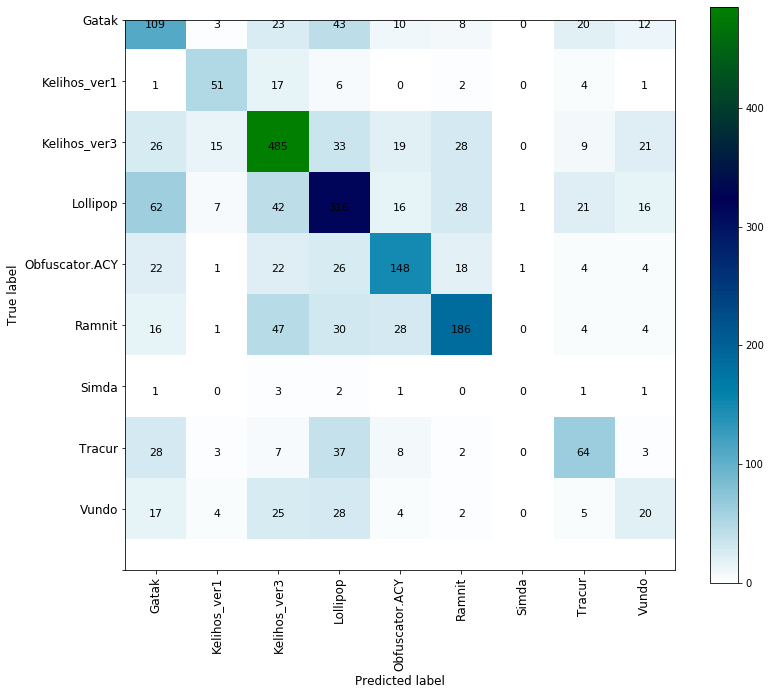

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Plotting the confusion matrix")
conf_mat = np.around(conf_matrix, decimals=2)  
figure = plt.gcf()
figure.set_size_inches(11, 10)
plt.imshow(conf_mat, interpolation='nearest', cmap='ocean_r')

for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col,row), ha='center', va='top', fontsize=11)
        
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=12)
plt.yticks(range(len(list_fams)+1), list_fams, fontsize=12)

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.tight_layout()
plt.colorbar()
plt.savefig('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_ET_asm.eps', bbox_inches='tight')
plt.savefig('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_ET_asm.png', bbox_inches='tight')

plt.show()

In [27]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)

In [28]:
pd.set_option('display.max_columns', None)  # force to display any number of columns.

In [29]:
#calculating true positives, false positives, true negatives and false negatives from confusion matrix
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [30]:
FP, FN, TP, TN

(array([173,  34, 186, 205,  86,  88,   2,  68,  62]),
 array([119,  31, 151, 193,  98, 130,   9,  88,  85]),
 array([109,  51, 485, 316, 148, 186,   0,  64,  20]),
 array([1882, 2167, 1461, 1569, 1951, 1879, 2272, 2063, 2116]))

In [31]:
#calculating false_omission_rate
NPV = TN/(TN+FN)
FOR = 1-NPV
FOR

array([0.05947026, 0.01410373, 0.09367246, 0.10953462, 0.04782821,
       0.06470881, 0.00394564, 0.0409112 , 0.03861881])

In [32]:
data = df.da.export_metrics(metrics_to_include=['true_positive_rate', 'true_negative_rate', 'false_positive_rate', 
                                              'false_negative_rate', 'false_discovery_rate'])

In [33]:
for num, fam in zip(range(25), list_fams):
    data.rename(columns={data.columns[num]:fam}, inplace=True)

data1 = data.drop(columns=['micro-average'])
data1 = data1.T
# data.drop(df.tail(1).index,inplace=True)

data1['false_omission_rate'] = list(FOR)

data1

,true_positive_rate,true_negative_rate,false_positive_rate,false_negative_rate,false_discovery_rate,false_omission_rate
Gatak,0.478070,0.915815,0.084185,0.521930,0.613475,0.059470
Kelihos_ver1,0.621951,0.984552,0.015448,0.378049,0.400000,0.014104
Kelihos_ver3,0.762579,0.887067,0.112933,0.237421,0.277198,0.093672
Lollipop,0.620825,0.884442,0.115558,0.379175,0.393474,0.109535
Obfuscator.ACY,0.601626,0.957781,0.042219,0.398374,0.367521,0.047828
Ramnit,0.588608,0.955262,0.044738,0.411392,0.321168,0.064709
Simda,0.000000,0.999120,0.000880,1.000000,1.000000,0.003946
Tracur,0.421053,0.968090,0.031910,0.578947,0.515152,0.040911
Vundo,0.190476,0.971534,0.028466,0.809524,0.756098,0.038619


In [34]:
for i in data1:
    print('Average of', i, '-->', round((np.average(data1[i])*100), 4))

Average of true_positive_rate --> 47.6132
Average of true_negative_rate --> 94.7074
Average of false_positive_rate --> 5.2926
Average of false_negative_rate --> 52.3868
Average of false_discovery_rate --> 51.601
Average of false_omission_rate --> 5.2533


In [35]:
#MCC value
print('MCC Score:', round(matthews_corrcoef(y_test, y_pred), 2))

MCC Score: 0.52


In [36]:
print("micro_precision :", metrics.precision_score(y_test, y_pred, average='micro'))
print("micro_recall :", metrics.recall_score(y_test, y_pred, average='micro'))
print("micro_f1_score :", metrics.f1_score(y_test, y_pred, average='micro'))

micro_precision : 0.604029785370127
micro_recall : 0.604029785370127
micro_f1_score : 0.604029785370127


In [37]:
print("macro_precision :", metrics.precision_score(y_test, y_pred, average='macro'))
print("macro_recall :", metrics.recall_score(y_test, y_pred, average='macro'))
print("macro_f1_score :", metrics.f1_score(y_test, y_pred, average='macro'))

macro_precision : 0.48399046621318625
macro_recall : 0.4761319546558604
macro_f1_score : 0.47841804214222894


In [38]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))  
y_test = enc.transform(y_test.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1))

In [39]:
y_test = y_test.toarray()
y_pred = y_pred.toarray()

In [40]:
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

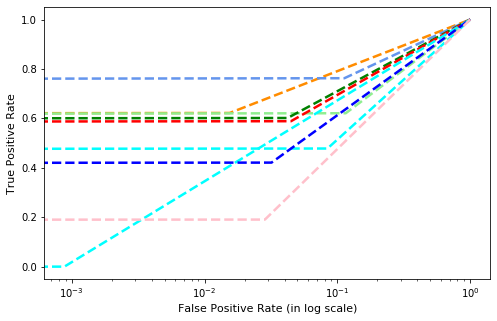

In [41]:
2# Compute macro-average ROC curve and ROC area

n_classes = 9
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2.5   # line width
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen', 'green', 'red', 'cyan', 'blue', 
                 'pink', 'purple', 'brown', 'coral', 'chocolate', 'indigo', 'navy'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='dashed', lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xscale("log")
plt.xlabel('False Positive Rate (in log scale)', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.savefig("/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_ET_asm.eps", bbox_inches='tight')
plt.savefig("/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/asm_plots/MobileNetV2_ET_asm.png", bbox_inches='tight')

plt.show()